<img src="https://github.com/strath-sdr/RFSoC-Book/blob/main/rfsoc_book/notebooks/common/rfsoc_book_banner.jpg?raw=1" alt="University of Strathclyde" align="left">

# Notebook Set D

---

## 01 - Baseband Modulation
In this notebook, we explore various baseband modulation schemes. These include Binary Phase Shift Keying (BPSK), Quadrature Phase Shift Keying (QPSK), and Quadrature Amplitude Modulation (QAM).

## Table of Contents
* [1. Introduction](#introduction)
* [2. Binary Phase Shift Keying (BPSK)](#bpsk)
* [3. Quadrature Phase Shift Keying (QPSK)](#qpsk)
* [4. Quadrature Amplitude Modulation (QAM)](#qam)
* [5. Conclusion](#conclusion)

## Revision
* **v1.0** | 05/12/22 | *First Revision*

---


## 1. Introduction <a class="anchor" id="introduction"></a>
In the context of wireless communications, baseband modulation is distinct from, and takes place prior to, the modulation of a signals from baseband to Intermediate Frequency (IF) or Radio Frequency (RF). Baseband modulation is the mapping of data bits to symbols according to the baseband modulation scheme. In this notebook, we will specifically cover the Phase Shift Keying (PSK) and Quadrature Amplitude Modulation (QAM) schemes.

For this notebook we will be using NumPy for computation and Matplotlib for matlab-like visualizations of our waveforms. We will import these libraries now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Binary Phase Shift Keying (BPSK) <a class="anchor" id="bpsk"></a>

One of the most common modulation schemes is BPSK, where each bit is assigned one symbol. We start by generating some random bits.

In [2]:
bits = np.random.randint(0,2,16)
bits

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

We can define the scheme as a simple Python list and use list comprehension to map every bit to a symbol. Now our bits will be mapped to the desired symbols.

In [3]:
bpsk_scheme = [-1+0j, 1+0j]
bpsk_symbols = [bpsk_scheme[i] for i in bits]

We can plot our BPSK 'modulated' data on a constellation map. Notice that they appear as dots on the horizontal plane, as BPSK only includes the real (I) component. Changes between these symbols are equivalent to a phase change of 180 degrees.

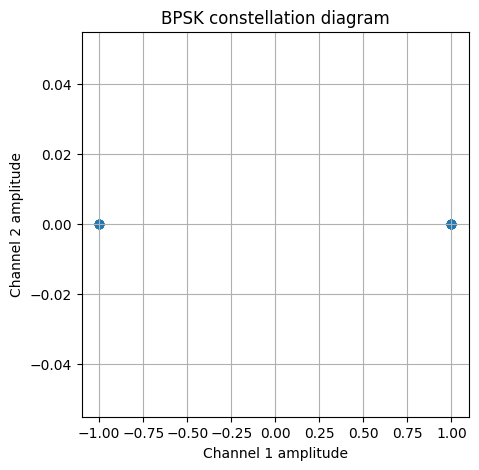

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(bpsk_symbols), np.imag(bpsk_symbols))
plt.title('BPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.grid()

## 3. Quadrature Phase Shift Keying (QPSK) <a class="anchor" id="qpsk"></a>

Not all modulation schemes need to have 2 symbols. If we take advantage of the 2nd (Quadrature) channel, we can represent 2 bits per symbol using the Quaternary Phase Shift Keying (QPSK) modulation scheme. In order to generate QPSK, we have a similar scheme. Except this time we have 4 possible symbols, which use 2 bits per symbol.

In [5]:
qpsk_scheme = [1+1j, 1-1j, -1+1j, -1-1j]

We perform the same mapping as we did earlier, but instead of generating random bits we can generate random integers from 0 to 3. These random integers represent our individual bit pairs i.e. 0 -> 00, 1 -> 01, 2 -> 10, 3 -> 11.

In [6]:
ints = np.random.randint(0,4,1024)
ints

array([3, 0, 1, ..., 1, 3, 1])

Again, using list comprehension we can map every integer to a symbol, which creates a vector of symbols ready for the next stages of modulation.

In [7]:
qpsk_symbols = [qpsk_scheme[i] for i in ints]

Now, if we plot the QPSK symbols on a constellation diagram, as we did with BPSK, we can see 4 distinct states for each symbol.

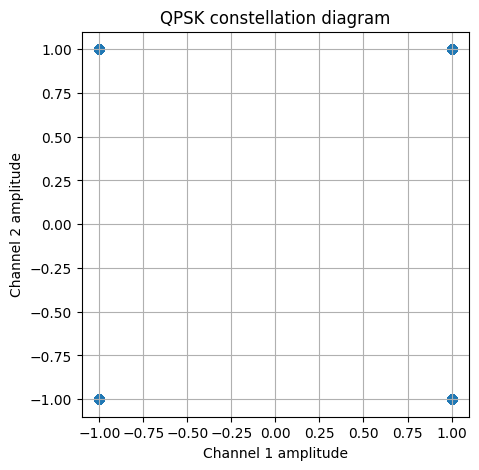

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(qpsk_symbols), np.imag(qpsk_symbols))
plt.title('QPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.grid()
plt.show()

## 4. Quadrature Amplitude Modulation (QAM) <a class="anchor" id="qam"></a>
Let's repeat the same process with 16-QAM. This time, we are using a modulation scheme with 4 levels (or 4 bits per symbol), which means we will need to generate integers in the range of 0-15. Don't forget, when specifying ranges in Python (like the NumPy randint function) the last digit is not inclusive.

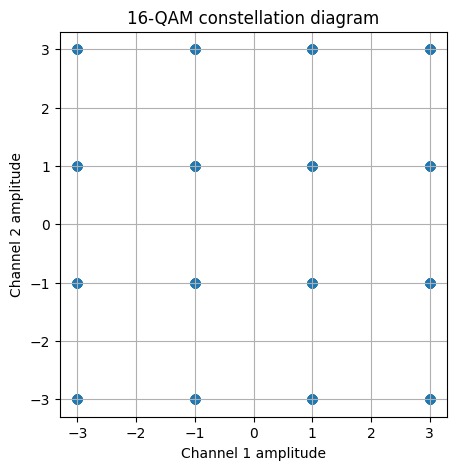

In [9]:
# Generate 16-QAM symbols
qam_scheme = [-3-3j, -3-1j, -3+3j, -3+1j,  \
              -1-3j, -1-1j, -1+3j, -1+1j,  \
               3-3j,  3-1j,  3+3j,  3+1j,  \
               1-3j,  1-1j,  1+3j,  1+1j]
ints = np.random.randint(0,16,1024)
qam_symbols = [qam_scheme[i] for i in ints]

# Plot the mapped symbols
plt.figure(figsize=(5,5))
plt.scatter(np.real(qam_symbols), np.imag(qam_symbols))
plt.title('16-QAM constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.grid()
plt.show()

We would proceed similarly with 64-QAM, 128-QAM, etc. With good channel conditions we could go as high as 1024-QAM! The advantage of using higher order modulation schemes is that we can stuff more bits into a single symbol, which can drastically improve our data throughput. However, as we will soon find out later in the next notebook, this makes our modulated data more susceptible to noise.

## 5. Conclusion <a class="anchor" id="conclusion"></a>
In this notebook, we covered some of the common baseband modulation schemes. In the next notebook, we explore the Signal to Noise Ratio (SNR), the Error Vector Magnitude (EVM), and the Bit Error Rate (BER).

---

[⬅️ Previous Notebook](../notebook_C/05_fast_fourier_transform.ipynb) || [Next Notebook 🚀](02_evm_and_ber.ipynb)

Copyright © 2023 Strathclyde Academic Media

---
---